In [ ]:
!pip install flair
!pip install flair torch
!pip install flair[gpt2]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 387.2/387.2 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 35.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.2/201.2 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 27.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 24.6

In [ ]:
from flair.models import TextClassifier
from flair.data import Sentence

from google.colab import drive
drive.mount('/content/drive')
data_dir = "/content/drive/My Drive/2 - NLP/1 - English Translations Cleaned/The Tale of Genji (Edward G. Seidensticker Translation) (Cleaned - Pure Text).txt"

Mounted at /content/drive


In [ ]:
def read_file(path):
  # Read file into an array of strings
  lines = []
  with open(path, encoding="utf8") as file:
      lines = file.readlines()
  # Remove newline characters from each line
  lines = [line.strip() for line in lines]
  return lines

In [ ]:


lines = read_file(data_dir)

lines = [i for i in lines if i!=""]

# Define the mapping of labels to numerical values
label_to_value = {
    'POSITIVE': 1.0,
    'NEGATIVE': -1.0,
    'NEUTRAL': 0.0,
}

# Define the window size (number of paragraphs)
window_size = 500

# Tokenize the text into sentences
sentences = [Sentence(i) for i in lines]  # Use an appropriate method to tokenize the text

# Initialize the sentiment classifier
classifier = TextClassifier.load('en-sentiment')

# Initialize a list to store sentiment scores
sentiment_scores = []


# Iterate through the text using a sliding window
for i in range(0, len(sentences) - window_size + 1, 10):
    # Extract sentences within the current window
    window = sentences[i:i + window_size]

    # Initialize variables for running sum and count
    running_sum = 0.0
    count = 0

    # Analyze sentiment for each sentence in the window
    for sentence in window:
        # Predict sentiment for the sentence using the classifier
        classifier.predict(sentence)

        # Get the sentiment label
        sentiment_label = sentence.labels[0].value

        # Map the label to its numerical value and add to the running sum
        sentiment_value = label_to_value.get(sentiment_label, 0.0)
        running_sum += sentiment_value

        # Increment the count
        count += 1

    # Calculate the running average for this window
    if count > 0:
        average_score = running_sum / count
    else:
        average_score = 0.0  # Handle the case where no sentences had sentiment labels

    # Store the average sentiment score for this window
    sentiment_scores.append(average_score)

    print(f"Average score at window {i}: {average_score}")

2023-12-17 02:23:14,875 https://nlp.informatik.hu-berlin.de/resources/models/sentiment-curated-distilbert/sentiment-en-mix-distillbert_4.pt not found in cache, downloading to /tmp/tmpngjte5cu


100%|██████████| 253M/253M [00:15<00:00, 16.6MB/s]

2023-12-17 02:23:31,449 copying /tmp/tmpngjte5cu to cache at /root/.flair/models/sentiment-en-mix-distillbert_4.pt


2023-12-17 02:23:32,504 removing temp file /tmp/tmpngjte5cu


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Average score at window 0: -0.244
Average score at window 10: -0.24
Average score at window 20: -0.248
Average score at window 30: -0.248
Average score at window 40: -0.24
Average score at window 50: -0.236
Average score at window 60: -0.244
Average score at window 70: -0.248
Average score at window 80: -0.24
Average score at window 90: -0.26
Average score at window 100: -0.26
Average score at window 110: -0.288
Average score at window 120: -0.3
Average score at window 130: -0.3
Average score at window 140: -0.304
Average score at window 150: -0.308
Average score at window 160: -0.304
Average score at window 170: -0.328
Average score at window 180: -0.332
Average score at window 190: -0.308
Average score at window 200: -0.324
Average score at window 210: -0.312
Average score at window 220: -0.312
Average score at window 230: -0.32
Average score at window 240: -0.32
Average score at window 250: -0.32
Average score at window 260: -0.316
Average score at window 270: -0.304
Average score a

In [ ]:
import pickle

# Save your object to Google Drive
with open('/content/drive/My Drive/Seidensticker_flair.pkl', 'wb') as file:
    pickle.dump(sentiment_scores, file)

# Load the object from Google Drive
with open('/content/drive/My Drive/Seidensticker_flair.pkl', 'rb') as file:
    loaded_object = pickle.load(file)

number of windows sampled: 980


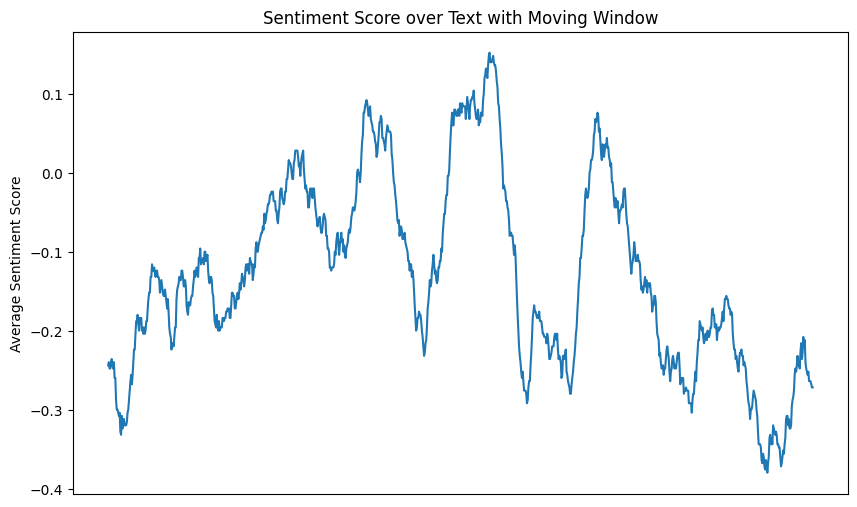

In [ ]:
from matplotlib import pyplot as plt

print(f"number of windows sampled: {len(sentiment_scores)}")
# Creating a simple line plot
plt.figure(figsize=(10, 6))
plt.plot(sentiment_scores, marker='')
plt.xticks([])
plt.title('Sentiment Score over Text with Moving Window')
plt.ylabel('Average Sentiment Score')
plt.show()